In [2]:
from IPython.display import Markdown as md

# Fibonacci Function Using Golden Ratio

First, let's define the Golden Ratio version of the Fibonacci Function:

## $F_{n} = \frac{(\Phi^n - (\Phi - 1)^n)}{\sqrt{5}}$

where $\Phi$ represents the [Golden Ratio](https://en.wikipedia.org/wiki/Golden_ratio):

## $\Phi = \frac{\sqrt{5} + 1}{2}$

or

In [3]:
(5**0.5 + 1) / 2

1.618033988749895


Turning this into a function:

In [29]:
# Fibonacci using the golden ratio (phi)
def fib_phi(n):
    from decimal import Decimal
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    return round((phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5)))

So, for a quick demonstration:

In [5]:
for n in range(1, 20):
    print(fib_phi(n))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


By default, the `Decimal` object is set to 28 digits of precision, which starts to fall apart around the 130th Fibonacci term.

We can see that with:

In [10]:
for n in range(130, 140):
    print("{} - {}".format(n, fib_phi(n)))

130 - 659034621587630041982498196
131 - 1066340417491710595814572137
132 - 1725375039079340637797070332
133 - 2791715456571051233611642469
134 - 4517090495650391871408712801
135 - 7308805952221443105020355268
136 - 11825896447871834976429068060
137 - 19134702400093278081449423320
138 - 30960598847965113057878491380
139 - 50095301248058391139327914670


136 and 137 both have zeros for least significant digits, meaning that digit will _always_ be zero from here on out, which simply doesn't make sense.  We can prove that by increasing the precision of `Decimal`:

In [34]:

import decimal

def set_precision(precision):
    decimal.getcontext().prec = precision
    return


def get_precision():
    return decimal.getcontext().prec


for n in range(130, 140):
    # use 28 digits precision
    set_precision(28)
    f1 = fib_phi(n)

    # use 29 digits precision
    set_precision(29)
    f2 = fib_phi(n)

    print("{} - {} - {}".format(n, f1, f2))


130 - 659034621587630041982498196 - 659034621587630041982498217
131 - 1066340417491710595814572137 - 1066340417491710595814572172
132 - 1725375039079340637797070332 - 1725375039079340637797070389
133 - 2791715456571051233611642469 - 2791715456571051233611642561
134 - 4517090495650391871408712801 - 4517090495650391871408712950
135 - 7308805952221443105020355268 - 7308805952221443105020355511
136 - 11825896447871834976429068060 - 11825896447871834976429068461
137 - 19134702400093278081449423320 - 19134702400093278081449423973
138 - 30960598847965113057878491380 - 30960598847965113057878492435
139 - 50095301248058391139327914670 - 50095301248058391139327916410


Even by the 130th term, the values differ.  This begs the question "How many digits precision is required to accurately determine the `n`th Fibonnaci number? Let's find out:

In [31]:
for prec in range(28, 48):
    broke = False

    for n in range(100, 200):
        set_precision(prec)
        f1 = fib_phi(n)

        set_precision(prec + 1)
        f2 = fib_phi(n)

        if f1 != f2:
            print("{} bit precision fails at #{}: {} - {} ".format(prec, n, f1, f2))
            broke = True
            break
    
    if not broke:
        print("Reached max value of n without failing with {} bit precision".format(prec))


28 bit precision fails at #123: 22698374052006863956975681 - 22698374052006863956975682 
29 bit precision fails at #128: 251728825683549488150424262 - 251728825683549488150424261 
30 bit precision fails at #132: 1725375039079340637797070383 - 1725375039079340637797070384 
31 bit precision fails at #137: 19134702400093278081449423918 - 19134702400093278081449423917 
32 bit precision fails at #142: 212207101440105399533740733470 - 212207101440105399533740733471 
33 bit precision fails at #148: 3807901929474025356630904134052 - 3807901929474025356630904134051 
34 bit precision fails at #154: 68330027629092351019822533679446 - 68330027629092351019822533679447 
35 bit precision fails at #158: 468340976726457153752543329995928 - 468340976726457153752543329995929 
36 bit precision fails at #162: 3210056809456107725247980776292057 - 3210056809456107725247980776292056 
37 bit precision fails at #166: 22002056689466296922983322104048464 - 22002056689466296922983322104048463 
38 bit precision fai

Feel free to play around with the ranges, they were arbitrary to get a feel for the data.  Time to have some fun.

Let's populate a dataframe with some data records.  Each record will contain:

- `prec` &mdash; Number of bits precision
- `n` &mdash; The value fed to `fib_phi()` that produces an inaccurate/inconsistent answer at the given precision
- `fib_n` &mdash; The actual value produced
- `fib_n_1` &mdash; The value of `fib_phi(n-1)` as comparison

First, we need `Pandas`.  If you don't have it installed already, no worries.  You can install it from within this notebook like so:

In [23]:
!pip install pandas

  The script f2py.exe is installed in 'e:\anaconda2\envs\py37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 18.0, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Then go ahead and use it.  First, update `fib_phi` to accept an optional `precision` parameter:

In [32]:
# Fibonacci using the golden ratio (phi)
def fib_phi(n, precision=None):
    from decimal import Decimal
    if n == 0:
        return 0
    if n == 1:
        return 1

    old_prec = get_precision()    
    if precision is not None:
        set_precision(precision)

    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    fib = round((phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5)))

    if precision is not None:
        set_precision(old_prec)

    return fib

In [43]:
class fib_rec:
    precision = None
    n = None
    fibn = None
    fib2 = None
    
    def __init__(self, precision, n, fibn, fib2):
        self.precision = precision
        self.n = n
        self.fibn = fibn
        self.fib2 = self.fib2

In [101]:
import pandas as pd

def build_dataset(prec_low=1, prec_high=25):
    dataset = []
    for prec in range(prec_low, prec_high):
        n = 1
        while True:
            ( f1, f2 ) = ( fib_phi(n, prec), fib_phi(n, prec+1) )
            if f1 != f2:
                dataset.append( (prec, n, f1 - f2, f1, f2) )
                # print("break at n = {} for prec = {}".format(n, prec))
                break
            n += 1    
    return dataset

dataset = build_dataset(1, 50)
labels = ['precision', 'n', 'delta', 'Fib(n,prec)', 'Fib(n,prec+1)']


In [70]:
df = pd.DataFrame(dataset, columns=labels)

df

,precision,n,delta,"Fib(n,prec)","Fib(n,prec+1)"
0,1,2,1,2,1
1,2,5,-1,4,5
2,3,11,1,90,89
3,4,17,1,1597,1596
4,5,17,-1,1596,1597
5,6,21,1,10947,10946
6,7,32,-1,2178309,2178310
7,8,32,1,2178310,2178309
8,9,37,1,24157818,24157817
9,10,38,-1,39088168,39088169


In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

%matplotlib inline

<AxesSubplot:xlabel='precision', ylabel='n'>

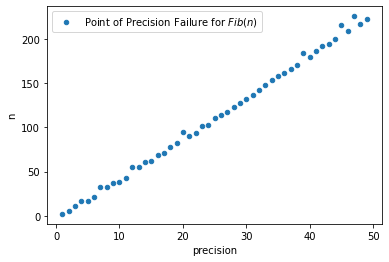

In [88]:
df2 = df[df.columns[[0,1]]]
df2.plot(x="precision", y="n", kind="scatter", label="Point of Precision Failure for $Fib(n)$")

Let's kick things up and look at twice that many precision bits:

In [96]:
df3 = pd.DataFrame(build_dataset(1, 100), columns=labels)

How's it look?

<AxesSubplot:xlabel='precision', ylabel='n'>

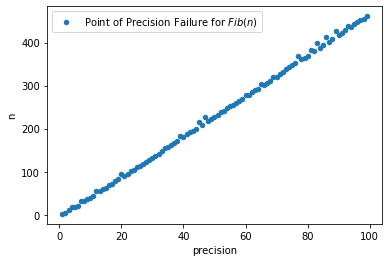

In [100]:
df3.plot(x="precision", y="n", kind="scatter", label="Point of Precision Failure for $Fib(n)$")

Time to do some colorizing

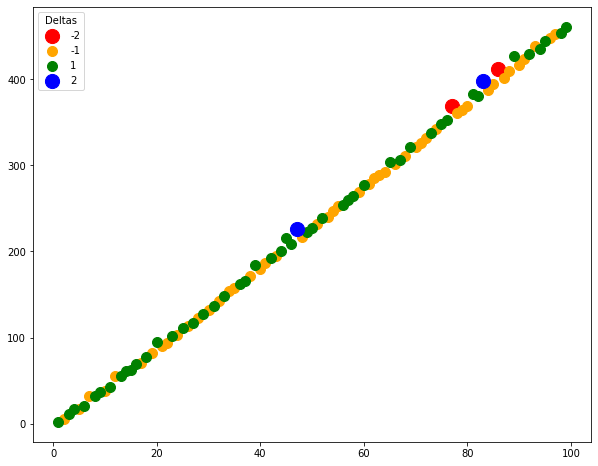

In [159]:
deltas = df3['delta'].unique()
colors = ['red', 'orange', '', 'green', 'blue']

fig, ax = plt.subplots(figsize=(10,8))

for name, group in df3.groupby('delta'):
    ax.scatter(x="precision", y="n", data=group, label=name, s=100 * abs(int(name)), c=colors[int(name)+2])

ax.legend(title="Deltas")

In [ ]:
df_a = df3[]

# for each unique value of delta
deltas = df3.groupby('delta')

for 
for delta in df3.delta.unique():
    d = df3[df3['delta'].isin([delta])]
    d.plot(x="precision", y="n", kind="scatter", label="Point of Precision Failure for $Fib(n)$", 
            s=100 * abs(d.delta), 
            c=
    )

